Rebecca Black

## Predicting Blood Donations Using A Classification Tree

This is an analysis of a dataset from drivendata.org. It predicts the probability of a blood donor making a donation in March 2007. This is a small dataset of ~600 observations with the following variables:
+ Months since Last Donation
+ Number of Donations
+ Total Volume Donated (in c.c.)
+ Months Since First Donation
+ Whether the donor gave blood in March 2007

This is a follow up to my previous analysis in which I used Logistic Regression to predict the probability of donating blood in March 2007. This analysis simply classifies the donors into two categories (Donation or No Donation.)

This analysis was done in R.

###### Read in the data

In [2]:
blood=read.csv('Training.csv', header=T)

### Print the initial structure and variables and the first few rows

In [3]:
dim(blood)
names(blood)
head(blood)

[1] 576   6

[1] "X"                           "Months.since.Last.Donation" 
[3] "Number.of.Donations"         "Total.Volume.Donated..c.c.."
[5] "Months.since.First.Donation" "Made.Donation.in.March.2007"

X,Months.since.Last.Donation,Number.of.Donations,Total.Volume.Donated..c.c..,Months.since.First.Donation,Made.Donation.in.March.2007
619,2,50,12500,98,1
664,0,13,3250,28,1
441,1,16,4000,35,1
160,2,20,5000,45,1
358,1,24,6000,77,0
335,4,4,1000,4,0


### Now for some E.D.A

##### Some summary statistics

In [4]:
#Let's change the last column to a factor (since this is a binary variable)
blood$Made.Donation.in.March.2007=as.factor(blood$Made.Donation.in.March.2007)

#Now we print the structure, summary, and first few rows
str(blood)
summary(blood)
head(blood)

'data.frame':	576 obs. of  6 variables:
 $ X                          : int  619 664 441 160 358 335 47 164 736 436 ...
 $ Months.since.Last.Donation : int  2 0 1 2 1 4 2 1 5 0 ...
 $ Number.of.Donations        : int  50 13 16 20 24 4 7 12 46 3 ...
 $ Total.Volume.Donated..c.c..: int  12500 3250 4000 5000 6000 1000 1750 3000 11500 750 ...
 $ Months.since.First.Donation: int  98 28 35 45 77 4 14 35 98 4 ...
 $ Made.Donation.in.March.2007: Factor w/ 2 levels "0","1": 2 2 2 2 1 1 2 1 2 1 ...


       X         Months.since.Last.Donation Number.of.Donations
 Min.   :  0.0   Min.   : 0.000             Min.   : 1.000     
 1st Qu.:183.8   1st Qu.: 2.000             1st Qu.: 2.000     
 Median :375.5   Median : 7.000             Median : 4.000     
 Mean   :374.0   Mean   : 9.439             Mean   : 5.427     
 3rd Qu.:562.5   3rd Qu.:14.000             3rd Qu.: 7.000     
 Max.   :747.0   Max.   :74.000             Max.   :50.000     
 Total.Volume.Donated..c.c.. Months.since.First.Donation
 Min.   :  250               Min.   : 2.00              
 1st Qu.:  500               1st Qu.:16.00              
 Median : 1000               Median :28.00              
 Mean   : 1357               Mean   :34.05              
 3rd Qu.: 1750               3rd Qu.:49.25              
 Max.   :12500               Max.   :98.00              
 Made.Donation.in.March.2007
 0:438                      
 1:138                      
                            
                            
        

X,Months.since.Last.Donation,Number.of.Donations,Total.Volume.Donated..c.c..,Months.since.First.Donation,Made.Donation.in.March.2007
619,2,50,12500,98,1
664,0,13,3250,28,1
441,1,16,4000,35,1
160,2,20,5000,45,1
358,1,24,6000,77,0
335,4,4,1000,4,0


This is all very straghtforward - there are no missing values and no suspicious summary statistics. So let's move on to the analysis. 

### The question we want to answer with this analysis

Will a donor give blood in March 2007?

I answered a similar question in a previous analysis I used a Logistic Regression model. This time I'm going to try a Classification Tree to predict the class category and then evaluate the performance using a confusion matrix.

In [9]:
#We first load the rpart library and fit the tree
library(rpart)
fit1<-rpart(Made.Donation.in.March.2007~Months.since.Last.Donation+
Number.of.Donations+Total.Volume.Donated..c.c..+Months.since.First.Donation,
method="class", data=blood)


Classification tree:
rpart(formula = Made.Donation.in.March.2007 ~ Months.since.Last.Donation + 
    Number.of.Donations + Total.Volume.Donated..c.c.. + Months.since.First.Donation, 
    data = blood, method = "class")

Variables actually used in tree construction:
[1] Months.since.First.Donation Months.since.Last.Donation 
[3] Number.of.Donations        

Root node error: 138/576 = 0.23958

n= 576 

        CP nsplit rel error  xerror     xstd
1 0.053140      0   1.00000 1.00000 0.074231
2 0.036232      3   0.84058 1.03623 0.075131
3 0.021739      4   0.80435 0.90580 0.071689
4 0.010000      6   0.76087 0.92029 0.072100
Call:
rpart(formula = Made.Donation.in.March.2007 ~ Months.since.Last.Donation + 
    Number.of.Donations + Total.Volume.Donated..c.c.. + Months.since.First.Donation, 
    data = blood, method = "class")
  n= 576 

          CP nsplit rel error    xerror       xstd
1 0.05314010      0 1.0000000 1.0000000 0.07423116
2 0.03623188      3 0.8405797 1.0362319 0.07513143
3 

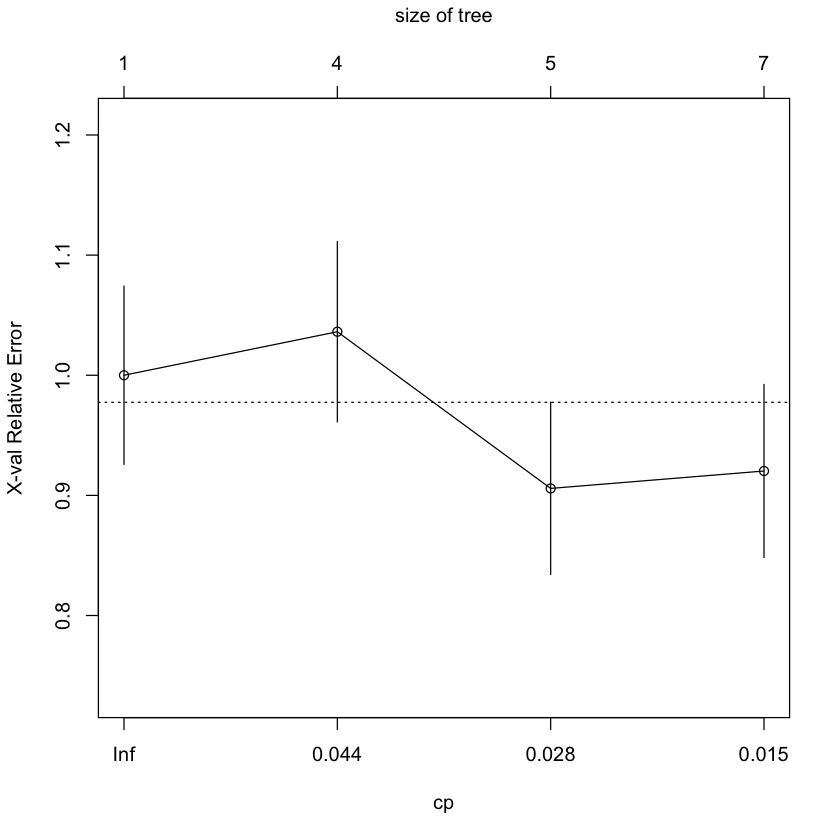

In [10]:
#Now we print the results of the constructed tree, visualize 
#the results, and examine a detailed summary of the split structure
printcp(fit1)
plotcp(fit1)
summary(fit1)

In [11]:
#Now let's evaluate how well this tree performs
pred = predict(fit1, type="class")
table(pred)
table(pred, blood$Made.Donation.in.March.2007)

pred
  0   1 
501  75 

    
pred   0   1
   0 417  84
   1  21  54

The confusion matrix shows that this is rather a poor classifier. This tree only correctly classifies 54/(84+54), or 39% of the positive instances. That is, only 39% of the time will it correctly predict whether a donor will give blood in March 2007. It does a far better job of correctly classifying the negative instances - it correctly classifies 95% of those instances. Now let's plot the tree and see if we can develop some intuition about how this tree has been constructed.

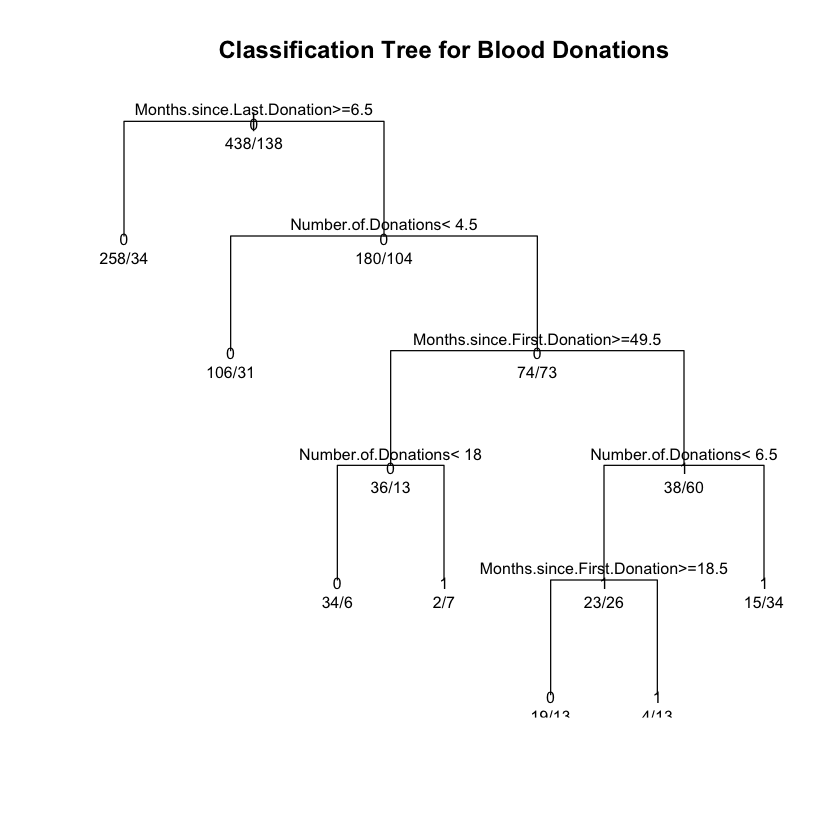

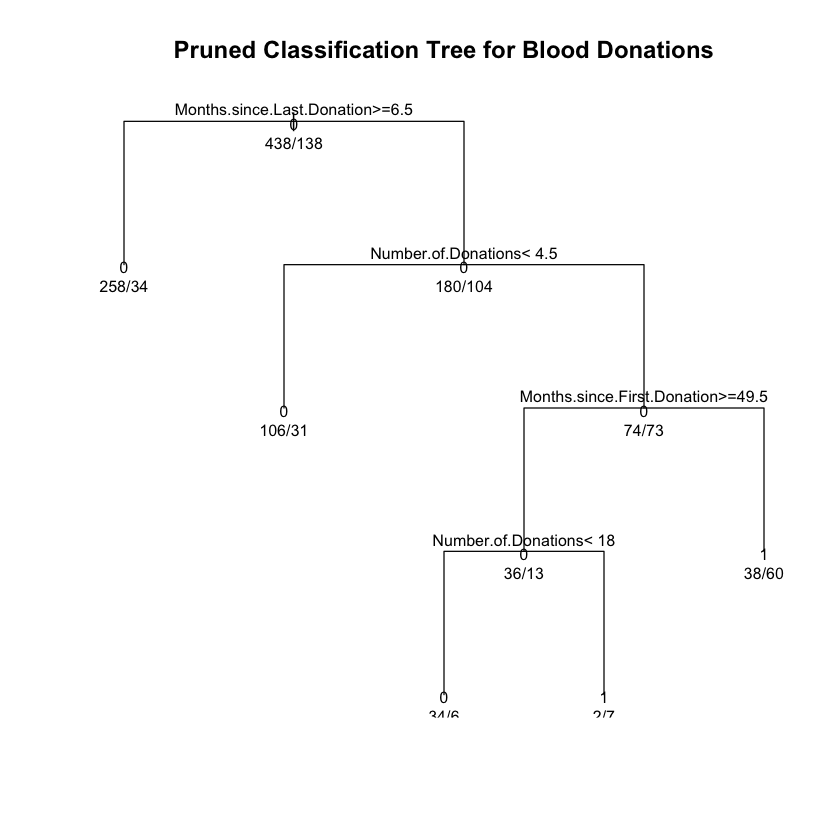

In [12]:
# plot tree 
plot(fit1, uniform=TRUE, 
main="Classification Tree for Blood Donations")
text(fit1, use.n=TRUE, all=TRUE, cex=.8)

# prune the tree 
pfit1<- prune(fit1, cp=fit1$cptable[which.min(fit1$cptable[,"xerror"]),"CP"])# plot the pruned tree 
plot(pfit1, uniform=TRUE, 
main="Pruned Classification Tree for Blood Donations")
text(pfit1, use.n=TRUE, all=TRUE, cex=.8)
title = ("Pruned Classification Tree for Blood Donations")

As we can see, most of the nodes in the tree are fairly impure. Additionally the pruned tree is identical to the original tree. Finally, we notice that the total volume of blood donated is not a useful splitting variable, which is the same result we found in the logistis regression analysis done previously.